In [9]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,accuracy_score,matthews_corrcoef,roc_auc_score
import matplotlib.pyplot as plt 
import os,sys,re,math

In [ ]:
estimator = lgb.LGBMRegressor(objective='regression',colsample_bytree=0.8,subsample=0.9,subsample_freq=5)

param_grid={
    'learning_rate':[0.01,0.02,0.05,0.1],
    'n_estimators' :[1000,2000,3000,4000,5000],
    'num_leaves':[128,1024,4096]
}

fit_param={'categorical_feature':[0,1,2,3,4,5]}
gbm = GridSearchCV(estimator,param_grid,fit_params=fit_param,n_jobs=5,refit=True)
gbm.fit(X_lgb,y_lgb)

print('.....................................cv results.......................')
print(gbm.cv_results_)

In [12]:
path_train = 'C:/Users/Crow/Desktop/human_data/Step_11_CV/Train_29_EGAAC_cv.txt'
path_test = 'C:/Users/Crow/Desktop/human_data/Step_11_IND/Test_29_EGAAC_gap4.txt'


In [15]:
path_train = 'C:/Users/Crow/Desktop/human_data_12.12/Step_11_CV/EGAAC/Train_29_EGAAC_gap4.txt'
path_test =  'C:/Users/Crow/Desktop/human_data_12.12/Step_11_IND/EGAAC/Test_29_EGAAC_gap4.txt'

In [2]:
def read_svm(file):
    encodings = []
    labels = []
    with open(file) as f:
        records = f.readlines()

    for line in records:
        line = re.sub('\d+:', '', line)
        array = line.strip().split() if line.strip() != '' else None
        encodings.append(array[1:])
        labels.append(int(array[0]))

    return np.array(encodings).astype(float), np.array(labels).astype(int)

In [3]:

def draw_ROC_curve(y_test,y_predict,savepath):
    '''
    画ROC曲线
    '''
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test, y_predict)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.savefig(savepath)
    plt.close(0)

In [4]:
def performance(labelArr, predictArr):
    #labelArr[i] is actual value,predictArr[i] is predict value
    TP = 0.; TN = 0.; FP = 0.; FN = 0.
    for i in range(len(labelArr)):
        if labelArr[i] == 1 and predictArr[i] == 1:
            TP += 1.
        if labelArr[i] == 1 and predictArr[i] == 0:
            FN += 1.
        if labelArr[i] == 0 and predictArr[i] == 1:
            FP += 1.
        if labelArr[i] == 0 and predictArr[i] == 0:
            TN += 1.
    if (TP + FN)==0:
        SN=0
    else:
        SN = TP/(TP + FN) #Sensitivity = TP/P  and P = TP + FN
    if (FP+TN)==0:
        SP=0
    else:
        SP = TN/(FP + TN) #Specificity = TN/N  and N = TN + FP
    if (TP+FP)==0:
        precision=0
    else:
        precision=TP/(TP+FP)
    if (TP+FN)==0:
        recall=0
    else:
        recall=TP/(TP+FN)
    GM=math.sqrt(recall*SP)
    #MCC = (TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    return precision,recall,SN,SP,GM,TP,TN,FP,FN

In [5]:
def write_score(path,pre,label):
    fw = open(path, 'w')

    for i in range(0,len(pre)):
        fw.write(str(pre[i]).replace('[','').replace(']',''))
        fw.write('\t')
        fw.write(str(label[i]))
        fw.write('\n')

    fw.close()

In [16]:
train = read_svm(path_train)
test = read_svm(path_test)

x_train = train[0]
y_train = train[1]

x_test = test[0]
y_test = test[1]

In [ ]:
print("starting first testing......")  
clf = lgb.LGBMClassifier(  
        boosting_type='gbdt', num_leaves=50, reg_alpha=0.0, reg_lambda=1,  
        max_depth=-1, n_estimators=1500, objective='binary',   
        learning_rate=0.05, min_child_weight=50, random_state=2018, n_jobs=-1
    )  
clf.fit(x_train, y_train, eval_set=[(x_train, y_train)], eval_metric='auc',early_stopping_rounds=1000) 

testdata = lgb.Dataset(x_test, y_test, silent=True)

preds = clf.predict(x_test[:,0:120], num_iteration=clf.best_iteration_)  # 输出的是概率结果
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
# eval
print(y_pred)
print('The roc of prediction is:', roc_auc_score(y_test, y_pred) )


In [ ]:
# Step1. 学习率和估计器及其数目


# 设置初始参数
params = { 
    'boosting_type': 'gbdt', 
    'objective': 'binary', 
    'learning_rate': 0.01, 
    'num_leaves': 50, 
    'max_depth': 6,    
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
}

# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': {'binary_logloss', 'auc'},
#     'num_leaves': 5,
#     'max_depth': 6,
#     'min_data_in_leaf': 450,
#     'learning_rate': 0.1,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.95,
#     'bagging_freq': 5,
#     'lambda_l1': 1,  
#     'lambda_l2': 0.001,  # 越小l2正则程度越高
#     'min_gain_to_split': 0.2,
#     'verbose': 5,
#     'is_unbalance': True
# }


data_train = lgb.Dataset(x_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=3000, nfold=5, stratified=False, shuffle=True,metrics='auc',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['auc-mean']))
print('best cv score:', cv_results['auc-mean'][-1])



In [ ]:
# Step2. max_depth 和 num_leaves


from sklearn.model_selection import GridSearchCV### 我们可以创建lgb的sklearn模型，使用上面选择的(学习率，评估器数目)
model_lgb = lgb.LGBMRegressor(objective='binary',num_leaves=50,
                              learning_rate=0.1, n_estimators=1254, max_depth=6,
                              metric='auc', bagging_fraction = 0.8,feature_fraction = 0.8)

params_test1={
    'max_depth': range(5,8,1),    
    'num_leaves':range(30,170, 30)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

gsearch1.fit(x_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



In [ ]:
param_test = {
        'max_depth': range(5,15,2),
        'num_leaves': range(10,40,5),
}
gsearch = GridSearchCV(estimator=model_lgb , param_grid = param_test, scoring='roc_auc', cv=5 )
gsearch.fit(x_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
print_best_score(gsearch,param_test)



In [ ]:
model_lgb = lgb.LGBMRegressor(objective='binary',num_leaves=50,
                              learning_rate=0.1, n_estimators=1254, max_depth=6,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)
model_lgb.fit(x_train,y_train)

In [ ]:
model_lgb.score

In [ ]:
params_test2={ 
    'max_depth': [6,7,8],    
    'num_leaves':[10,20,30,40,50,60]
}

gsearch2 = GridSearchCV(estimator=model_lgb, param_grid=params_test2, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
gsearch2.fit(x_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



In [ ]:

# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # GBDT算法为基础
#     'objective': 'binary',  # 因为要完成预测用户是否买单行为，所以是binary，不买是0，购买是1
#     'metric': 'auc',  # 评判指标
#     'max_bin': 255,  # 大会有更准的效果,更慢的速度
#     'learning_rate': 0.1,  # 学习率
#     'num_leaves': 64,  # 大会更准,但可能过拟合
#     'max_depth': -1,  # 小数据集下限制最大深度可防止过拟合,小于0表示无限制
#     'feature_fraction': 0.8,  # 防止过拟合
#     'bagging_freq': 5,  # 防止过拟合
#     'bagging_fraction': 0.8,  # 防止过拟合
#     'min_data_in_leaf': 21,  # 防止过拟合
#     'min_sum_hessian_in_leaf': 3.0,  # 防止过拟合
# }

params = { 
    'boosting_type': 'gbdt', 
    'objective': 'binary', 
    'metric': {'auc'},
    'learning_rate': 0.01, 
    'num_leaves': 50, 
    'max_depth': 6,    
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    'max_bin': 255
}

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [ ]:

print('Start training...')
# train
model_lgb = lgb.LGBMRegressor(objective='binary',num_leaves=50,
                              learning_rate=0.1, n_estimators=1254, max_depth=6,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)
model_lgb.fit(x_train,y_train)
# gbm = lgb.train(params,
#     lgb_train,
#     num_boost_round=20,
#     valid_sets=lgb_eval,
#     early_stopping_rounds=5)
print('Save model...')
# save model to file
model_lgb.save_model('C:/Users/Crow/Desktop/human_data/model.txt')
print('Start predicting...')
# predict
y_pred = model_lgb.predict(x_test, num_iteration=model_lgb.best_iteration)
# eval
print(y_pred)
print('The roc of prediction is:', roc_auc_score(y_test, y_pred) )



In [ ]:
lgb_train = lgb.Dataset(x_train, y_train, free_raw_data=False)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train,free_raw_data=False)

### 交叉验证(调参)
print('交叉验证')
min_merror = float('Inf')
best_params = {}
# 准确率
print("调参1：提高准确率")
for num_leaves in range(20,200,5):
    for max_depth in range(3,8,1):
        params['num_leaves'] = num_leaves
        params['max_depth'] = max_depth
        cv_results = lgb.cv(
                            params,
                            lgb_train,
                            #seed=2018,
                            nfold=5,
                            metrics=['binary_error'],
                            early_stopping_rounds=10,
                            verbose_eval=True
                         )
        mean_merror = pd.Series(cv_results['binary_error-mean']).min()
        boost_rounds = pd.Series(cv_results['binary_error-mean']).argmin()
        if mean_merror < min_merror:
            min_merror = mean_merror
            best_params['num_leaves'] = num_leaves
            best_params['max_depth'] = max_depth
params['num_leaves'] = best_params['num_leaves']
params['max_depth'] = best_params['max_depth']
 

In [ ]:
print(params)

In [ ]:
# 过拟合
print("调参2：降低过拟合")
for max_bin in range(1,255,5):
    for min_data_in_leaf in range(10,200,5):
            params['max_bin'] = max_bin
            params['min_data_in_leaf'] = min_data_in_leaf
 
            cv_results = lgb.cv(
                                params,
                                lgb_train,
                                seed=42,
                                nfold=5,
                                metrics=['binary_error'],
                                early_stopping_rounds=3,
                                verbose_eval=True
                                )

            mean_merror = pd.Series(cv_results['binary_error-mean']).min()
            boost_rounds = pd.Series(cv_results['binary_error-mean']).argmin()

            if mean_merror < min_merror:
                min_merror = mean_merror
                best_params['max_bin']= max_bin
                best_params['min_data_in_leaf'] = min_data_in_leaf

params['min_data_in_leaf'] = best_params['min_data_in_leaf']
params['max_bin'] = best_params['max_bin']
print(best_params['min_data_in_leaf'],best_params['max_bin']) 

In [ ]:
# create dataset for lightgbm  
lgb_train = lgb.Dataset(x_train, y_train)  
lgb_eval = lgb.Dataset(x_test, y_test)  
# specify your configurations as a dict  
params = {  
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': {'binary_logloss', 'auc'},  #二进制对数损失
    'num_leaves': 30,  
    'max_depth':5,  
    #'min_data_in_leaf': 30,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 0
}  

# train  
print('Start training...')  
gbm = lgb.train(params,  
                lgb_train,  
                num_boost_round=2000,  
                valid_sets=lgb_eval,  
                early_stopping_rounds=100
            )  

print('Start predicting...')  

preds = gbm.predict(x_test, num_iteration=gbm.best_iteration)  # 输出的是概率结果  

# 导出结果  
threshold = 0.5  
for pred in preds:  
    result = 1 if pred > threshold else 0  



In [ ]:
params['learning_rate']=0.01
lgb.train(
          params,                     # 参数字典
          lgb_train,                  # 训练集
          valid_sets=lgb_eval,        # 验证集
          num_boost_round=2000,       # 迭代次数
          early_stopping_rounds=50    # 早停次数
          )



In [ ]:
### 线下预测
print ("线下预测")
preds_offline = lgb.predict(testdata, num_iteration=lgb.best_iteration) # 输出概率
offline=offline_test[['instance_id','is_trade']]
offline['preds']=preds_offline
offline.is_trade = offline['is_trade'].astype(np.float64)
print('log_loss', metrics.log_loss(offline.is_trade, offline.preds))


In [ ]:
print('Start training...')
# 创建模型，训练模型
gbm = lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05,n_estimators=200,bagging_fraction=1.0)
gbm.fit(x_train, y_train,eval_set=[(x_test, y_test)],eval_metric='l1',early_stopping_rounds=20)

print('Start predicting...')
# 测试机预测
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)
# 模型评估
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))

# 网格搜索，参数优化
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 400]
}

gbm = GridSearchCV(estimator, param_grid)

gbm.fit(x_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)


In [ ]:

from sklearn.model_selection import train_test_split

train_X, valid_X, train_Y, valid_Y = train_test_split(
        x_train, y_train, test_size=0.2, random_state=2)  # 将训练集分为训练集+验证集
lgb_train = lgb.Dataset(train_X, label=train_Y)
lgb_eval = lgb.Dataset(valid_X, label=valid_Y, reference=lgb_train)
print("Training...")
bst = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_eval],
        num_boost_round=500,
        early_stopping_rounds=200
)
print("Saving Model...")
bst.save_model('./model.txt')  # 保存模型
print("Predicting...")
predict_result = bst.predict(x_test)  # 预测的结果在0-1之间，值越大代表预测用户购买的可能性越大



In [ ]:
print('The roc of prediction is:', roc_auc_score(y_test, predict_result) )


In [34]:
# 最优参数结果

gbm = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
                         metric = 'auc',
                         max_depth = 10,
                         num_leaves =  270,
                         feature_fraction=0.7,
                         bagging_fraction= 0.65,
                         bagging_freq= 2,
                         learning_rate = 0.011,
                         
                         cat_smooth = 0,
                         min_data_in_leaf=52,
                         n_estimators=1000,
                         
                         lambda_l1= 0.2,
                         lambda_l2= 0,
                         min_split_gain = 0,
                         is_unbalance=True,
                         verbose = 1
                         
)

gbm.fit(x_train, y_train)
pred = gbm.predict_proba(x_test)
print('The roc of prediction is:', roc_auc_score(y_test, pred[:,1]))



The roc of prediction is: 0.7890026879567921


ACC:  0.904300 
Sn: 0.996411
Sp: 0.895121
MCC: 0.658186 
AUC: 0.993034


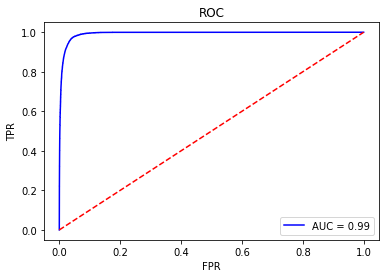

In [35]:
p_label = gbm.predict(x_train)
pred = gbm.predict_proba(x_train)
fpr, tpr, thresholds = roc_curve(y_train,pred[:,1],pos_label=1)

precision,recall,SN,SP,GM,TP,TN,FP,FN = performance(y_train,p_label)

print("ACC:  %f "  %accuracy_score(y_train,p_label))
print("Sn: %f" %SN)
print("Sp: %f" %SP)
print("MCC: %f " %matthews_corrcoef(y_train,p_label))
print("AUC: %f" % auc(fpr, tpr))

draw_ROC_curve(y_train,pred[:,1],'human')
write_score('C:/Users/Crow/Desktop/human_data_12.12/Train_LightGBM_result.txt',p_label,y_train)

ACC:  0.818409 
Sn: 0.491571
Sp: 0.847791
MCC: 0.242893 
AUC: 0.789003


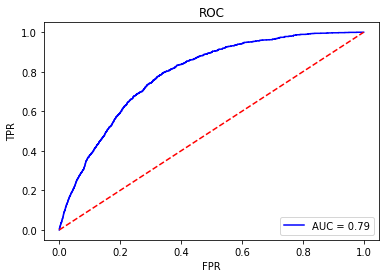

In [36]:
p_label = gbm.predict(x_test)
pred = gbm.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test,pred[:,1],pos_label=1)

precision,recall,SN,SP,GM,TP,TN,FP,FN = performance(y_test,p_label)

print("ACC:  %f "  %accuracy_score(y_test,p_label))
print("Sn: %f" %SN)
print("Sp: %f" %SP)
print("MCC: %f " %matthews_corrcoef(y_test,p_label))
print("AUC: %f" % auc(fpr, tpr))

draw_ROC_curve(y_test,pred[:,1],'human')
write_score('C:/Users/Crow/Desktop/human_data_12.12/Test_LightGBM_result.txt',p_label,y_test)